# Pymaceuticals Inc.
---
sorry I'm late, here's a poem
### Analysis

- Dataframes, bars, lines and pies
- but the best, it seems, a box describes
- by the end of the treatment
- Ramicane most affects a tumor's size
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sb

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

mice_df_unclean = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mice_df_unclean.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mice_df_unclean["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mau5_dupes = mice_df_unclean[mice_df_unclean.duplicated(subset=["Mouse ID","Timepoint"])]
mau5_dupes["Mouse ID"].unique()


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
error_mau5 = mice_df_unclean[mice_df_unclean["Mouse ID"] == "g989"]
error_mau5

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_df = mice_df_unclean[mice_df_unclean["Mouse ID"] != "g989"]
# mice_df_unclean.drop_duplicates(subset=["Mouse ID","Timepoint"], keep='first') -- so that's not wnat you meant I guess, in order to reduce the mau5 count
# for the record, I get 'why'... ever-discrepant data across timepoints, it's unclear which are accurate
mice_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
mice_df["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

t_mean = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
t_med = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
t_var = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
t_dev = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
t_err = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
sum_stats = (pd.merge(t_mean.to_frame("Mean Tumor Volume"), 
                      t_med.to_frame("Median Tumor Volume"), on="Drug Regimen", how="left")
                 .merge(t_var.to_frame("Tumor Volume Variance"), on="Drug Regimen", how="left")
                 .merge(t_dev.to_frame("Tumor Volume Std. Dev."), on="Drug Regimen", how="left")
                 .merge(t_err.to_frame("Tumor Volume Std. Err."), on="Drug Regimen", how="left")
            )
sum_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
##### uh, I didn't know how else do get the 'top-level' title w/o first making this dictionary as ripped from:
##### https://www.geeksforgeeks.org/grouping-and-aggregating-with-pandas/
##### agg_dictionary = {"Tumor Volume (mm3)" : ['mean','median','var','std','sem']}
##### this replaces the original w/o top-level header:
##### ... = mice_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].aggregate(['mean','median','var','std','sem'])
# Using the aggregation method, produce the same summary statistics in a single line
agg_ro = mice_df.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)" : ['mean','median','var','std','sem']})
agg_ro

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

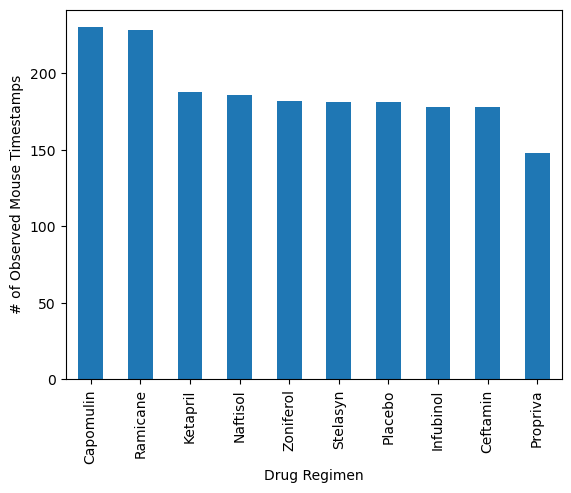

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# multiple sources via google, but had to make a variable to emulate what I found on https://www.statology.org/pandas-plot-value-counts/
drugs = mice_df["Drug Regimen"]
panda_plot_1 = drugs.value_counts().plot(kind='bar', xlabel="Drug Regimen", ylabel="# of Observed Mouse Timestamps")


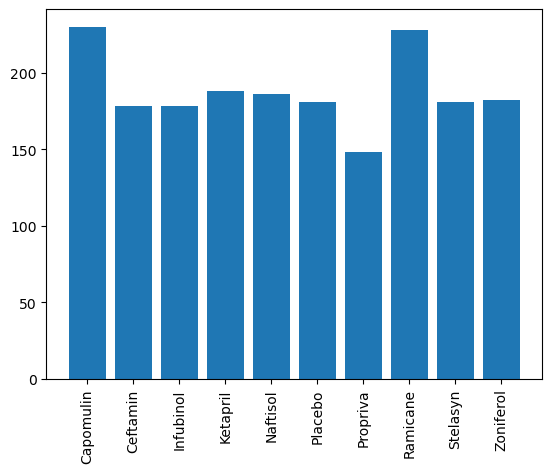

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Imported numpy and simplified array syncronization based on the following source. Isn't an exacty emulation, but the values match:
# https://medium.com/@nawazmohtashim/count-unique-values-in-numpy-array-42c9a7bdafb8
# py_drugs = []
# for each in drugs:
#    if each not in py_drugs:
#        py_drugs.append(each)
# print(py_drugs)


py_drugs, drug_counts = np.unique(drugs, return_counts=True)                   # print(py_drugs, drug_counts)
plt.bar(py_drugs, drug_counts)
plt.xticks(rotation=90)
plt.show()


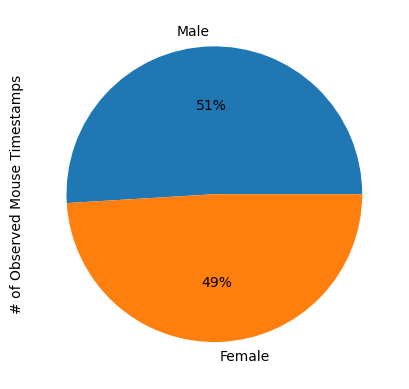

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
panda_plot_2 = mice_df["Sex"].value_counts().plot(kind='pie', ylabel="# of Observed Mouse Timestamps", autopct='%1.0f%%')

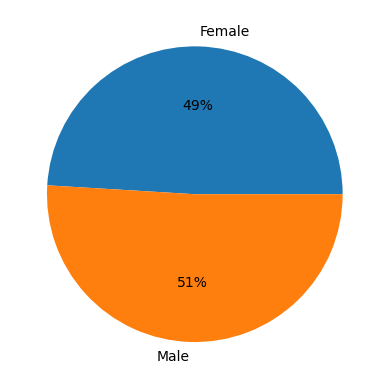

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
py_sex, sex_counts = np.unique(mice_df["Sex"], return_counts=True)
plt.pie(sex_counts, labels=py_sex, autopct='%1.0f%%')
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_mau5 = mice_df[(mice_df["Drug Regimen"] == "Capomulin") | 
            (mice_df["Drug Regimen"] == "Ramicane") | 
            (mice_df["Drug Regimen"] == "Infubinol") | 
            (mice_df["Drug Regimen"] == "Ceftamin")]
#capa_mau5 = mice_df[mice_df["Drug Regimen"] == "Capomulin"]
#rami_mau5 = mice_df[mice_df["Drug Regimen"] == "Ramicane"]
#infu_mau5 = mice_df[mice_df["Drug Regimen"] == "Infubinol"]
#ceft_mau5 = mice_df[mice_df["Drug Regimen"] == "Ceftamin"]
# Start by getting the last (greatest) timepoint for each mouse
four_tet = pd.DataFrame(four_mau5.groupby(["Mouse ID"])["Timepoint"].max())
#rami_last = pd.DataFrame(rami_mau5.groupby(["Mouse ID"])["Timepoint"].max())
#infu_last = pd.DataFrame(infu_mau5.groupby(["Mouse ID"])["Timepoint"].max())
#ceft_last = pd.DataFrame(ceft_mau5.groupby(["Mouse ID"])["Timepoint"].max())
four_tet
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_plot = pd.merge(four_tet, mice_df, on=("Mouse ID", "Timepoint"), how="left")
last_plot.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25


In [16]:
# Put treatments into a list for for loop (and later for plot labels)

treats = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

nah = [] # You'll have noticed I imported seaborn, so yeah, nah

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds
for x in range(len(treats)):
    outliers = []
    quartiles = last_plot[last_plot["Drug Regimen"] == treats[x]]["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    iqr
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = last_plot[(last_plot["Drug Regimen"] == treats[x]) 
                   & ((last_plot["Tumor Volume (mm3)"] < lower_bound) 
                   | (last_plot["Tumor Volume (mm3)"] > upper_bound))]
    print(f"{treats[x]}s potential outliers: {outliers['Tumor Volume (mm3)']}")

Capomulins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicanes potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinols potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamins potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


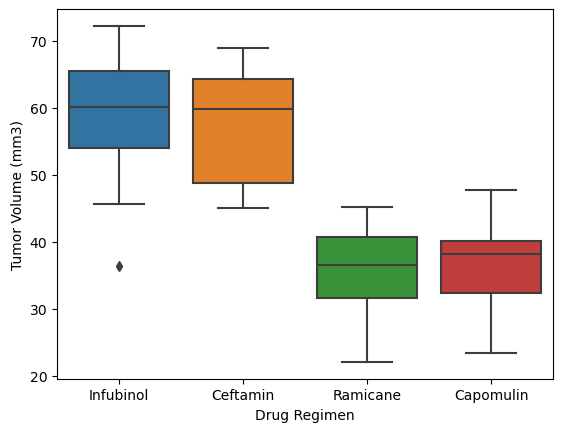

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Trying out seaborn: https://www.geeksforgeeks.org/grouped-boxplots-in-python-with-seaborn/
# so easy this way
sb.boxplot(x = last_plot["Drug Regimen"],
           y = last_plot["Tumor Volume (mm3)"])
plt.show()

## Line and Scatter Plots

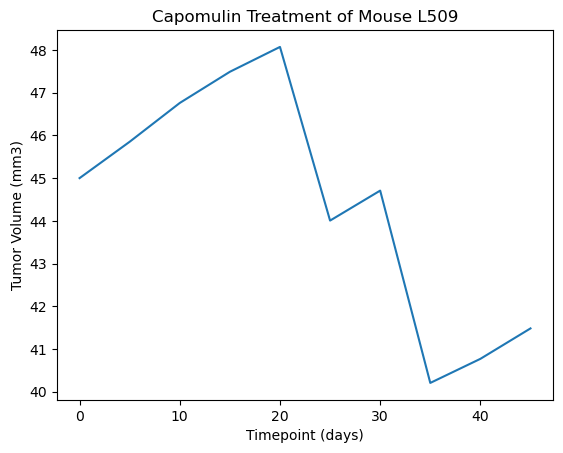

In [18]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capa_mau5 = mice_df[mice_df["Drug Regimen"] == "Capomulin"]
prisoner_l509 = capa_mau5[capa_mau5["Mouse ID"]=="l509"]
l5_time = prisoner_l509["Timepoint"]
l5_vol = prisoner_l509["Tumor Volume (mm3)"]
plt.plot(l5_time, l5_vol)
plt.title("Capomulin Treatment of Mouse L509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

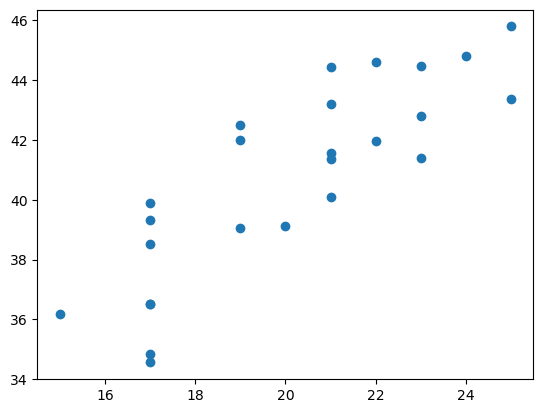

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

c_weight = capa_mau5.groupby(["Mouse ID"])["Weight (g)"].mean()
c_volume = capa_mau5.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()

plt.scatter(c_weight, c_volume) 
plt.show()

## Correlation and Regression

The correlation coefficient between malic acid and flavanoids is 0.84


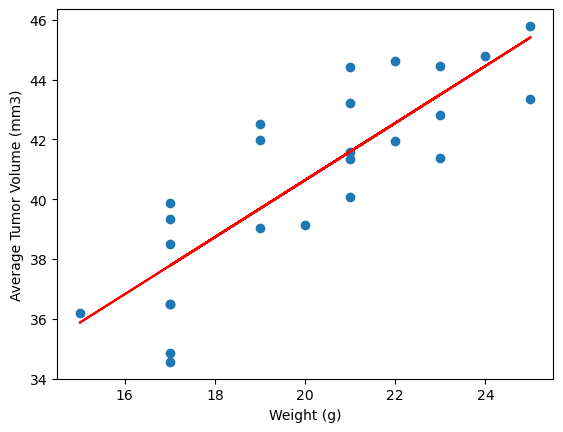

In [20]:
# Calculate the correlation coefficient and a linear regression model 

print(f"The correlation coefficient between malic acid and flavanoids is {round(st.pearsonr(c_weight,c_volume)[0],2)}")
#print(st.linregress(c_weight, c_volume))
slope, intercept, r_value, p_value, std_err = st.linregress(c_weight, c_volume)
my_line = slope * c_weight + intercept

# for mouse weight and average observed tumor volume for the entire Capomulin regimen
plt.scatter(c_weight, c_volume) 
plt.plot(c_weight, my_line, color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()